<a href="https://colab.research.google.com/github/rafayrty/Probability/blob/main/books_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#P&S PROJECT:
Abdul Rafay

**Dataset Selected:**
https://www.kaggle.com/datasets/valakhorasani/best-books-of-the-decade-2020s

Observations about the Dataset:

A collection of the top 2,327 books from the 2020s based on user ratings and popularity. Columns include:<br/>

**Index:** Unique identifier for each book.<br/>
**Book Name:** The title of the book.<br/>
**Author:** The author(s) of the book.<br/>
**Rating:** Average user rating (on a scale of 1 to 5).<br/>
**Number of Votes:** Total number of votes the book received.<br/>
**Score:** An aggregate score calculated based on ratings and votes.<br/>

# Regression Analysis on Books Dataset
This notebook performs regression analysis on a dataset of books.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from IPython.display import display
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import t


## Load and Clean the Dataset

In [ ]:
# Load the dataset
url = 'books_of_the_decade.csv'  # Replace with the file path if running locally
books_data = pd.read_csv(url)

# Data Cleaning
books_data['Number of Votes'] = books_data['Number of Votes'].str.replace(',', '').astype(int)
display(books_data.head())


,Index,Book Name,Author,Rating,Number of Votes,Score
0,1,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,1184531,62443
1,2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,718243,47323
2,3,Project Hail Mary,Andy Weir,4.51,657869,45972
3,4,The Midnight Library,Matt Haig,3.99,1967348,42746
4,5,I'm Glad My Mom Died,Jennette McCurdy,4.46,1151831,37509


## Exploratory Data Analysis (EDA)


,Rating,Number of Votes,Score
count,2329.000000,2.329000e+03,2329.000000
mean,4.036909,6.191565e+04,597.599399
std,0.319168,1.637730e+05,2947.850623
min,2.660000,1.000000e+00,2.000000
25%,3.820000,2.691000e+03,79.000000
50%,4.060000,1.201900e+04,97.000000
75%,4.260000,4.992200e+04,195.000000
max,5.000000,2.071618e+06,62443.000000


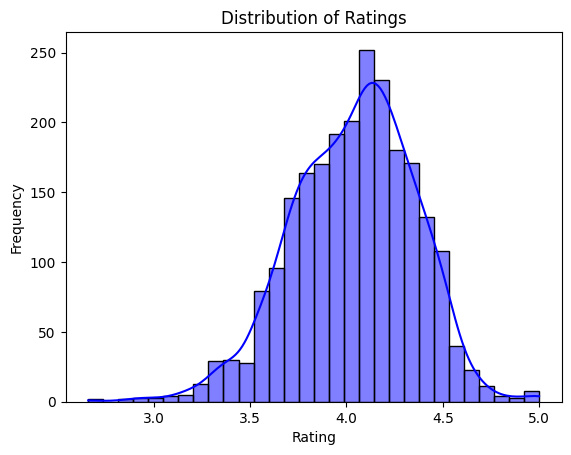

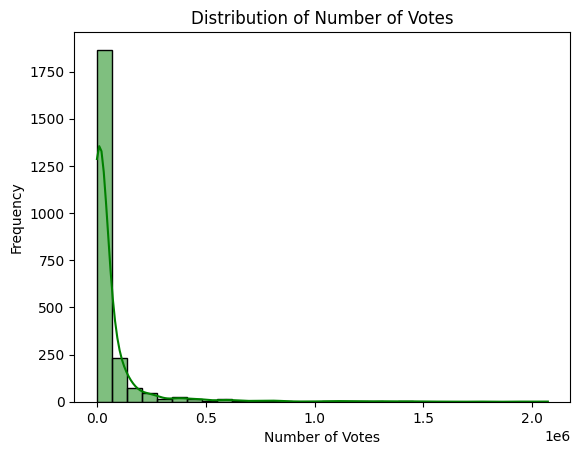

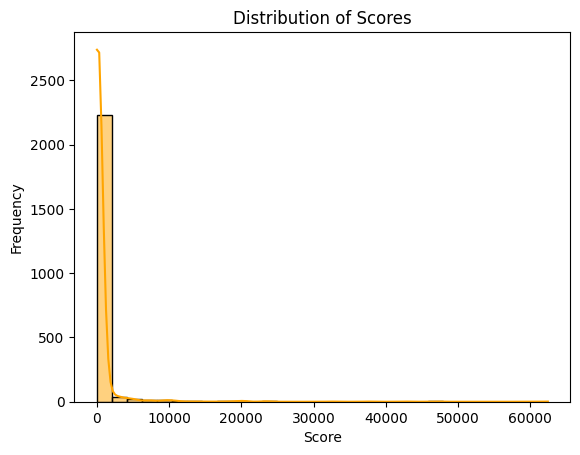

In [ ]:
selected_columns = ['Rating', 'Number of Votes', 'Score']
books_data_descriptive_stats = books_data[selected_columns].describe()
display(books_data_descriptive_stats)

# Plot distributions
sns.histplot(books_data['Rating'], kde=True, bins=30, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

sns.histplot(books_data['Number of Votes'], kde=True, bins=30, color='green')
plt.title('Distribution of Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

sns.histplot(books_data['Score'], kde=True, bins=30, color='orange')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Observations from the Visualizations:

1.	**Distributions:**<br/>
	  **Rating:** A slightly right-skewed distribution with most ratings between 3.5 and 4.5, indicating that books generally receive favorable ratings.<br/>
	  **Number of Votes:** Highly right-skewed, with a few books receiving an extremely high number of votes.<br/>
	  **Score:** Also right-skewed, reflecting the scoring system’s dependence on factors like popularity or votes.<br/><br/>
2.	**Correlation Matrix:**<br/>
		**Rating and Number of Votes**: Moderate positive correlation, suggesting that books with higher ratings tend to receive more votes.<br/>
	  **Rating and Score**: Weak positive correlation.<br/>
	  **Number of Votes and Score**: Strong positive correlation, indicating that the number of votes significantly influences the score.

### Correlation Analysis

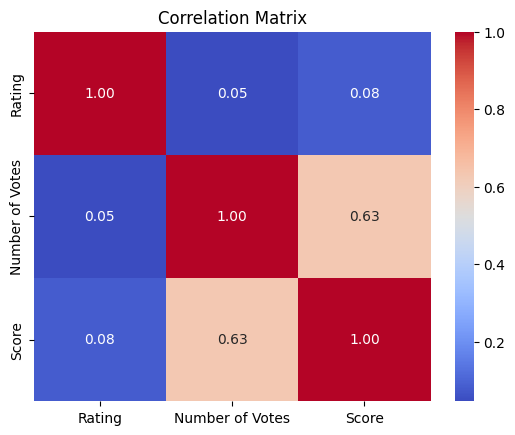

In [ ]:
correlation_matrix = books_data[['Rating', 'Number of Votes', 'Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Regression Analysis
Diving data set into training (80%) and test (20%) data<br/>
The low MSE and MAE suggest that the model predicts reasonably well, but the contribution of Number of Votes and Score to predicting Rating is minimal.




In [ ]:
# Prepare features and target variable
X = books_data[['Number of Votes', 'Score']]
y = books_data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

# Error Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.09804150489037
Mean Absolute Error (MAE): 0.25026499917643463


#Hypothesis Testing
**Null Hypothesis (H₀):** The average rating of books with low votes is equal to the average rating of books with high votes.

 $H_0: \mu_{\text{low votes}} = \mu_{\text{high votes}}$


**Alternative Hypothesis (H₁):** The average rating of books with low votes is significantly different from the average rating of books with high votes.<br/>
$H_1: \mu_{\text{low votes}} \neq \mu_{\text{high votes}}$


In [ ]:
# Calculate the median of the 'Number of Votes' column
median_votes_new = books_data['Number of Votes'].median()

# Segment the dataset into two groups
low_votes_group_new = books_data[books_data['Number of Votes'] < median_votes_new]['Rating']
high_votes_group_new = books_data[books_data['Number of Votes'] >= median_votes_new]['Rating']

# Perform a two-sample t-test
t_stat_new, p_value_new = ttest_ind(low_votes_group_new, high_votes_group_new, equal_var=False)

# Calculate the mean ratings for both groups
low_votes_mean_new = low_votes_group_new.mean()
high_votes_mean_new = high_votes_group_new.mean()
print("T-Stastic:",t_stat_new)
print("P-Value:",t_stat_new)
print("Mean Rating (Low Votes Group):",t_stat_new)
print("Mean Rating (High Votes Group):",t_stat_new)

#t_stat_new, p_value_new, low_votes_mean_new, high_votes_mean_new

T-Stastic: -0.09236423154649841
P-Value: -0.09236423154649841
Mean Rating (Low Votes Group): -0.09236423154649841
Mean Rating (High Votes Group): -0.09236423154649841


The p-value (0.9264) is much greater than the significance level (0.05), meaning we fail to reject the null hypothesis. There is no significant difference in the average ratings between books with low and high numbers of votes.

### Confidence Intervals for the Difference in Means:
Difference in means refers to the average ratings between the two groups of books:
<br/>**High Votes Group:** Books with a number of votes above or equal to the median.
<br/>**Low Votes Group:** Books with a number of votes below the median.

In [ ]:
# Calculate the standard error for the difference in means
n_low = len(low_votes_group_new)
n_high = len(high_votes_group_new)
std_low = low_votes_group_new.std(ddof=1)
std_high = high_votes_group_new.std(ddof=1)

# Pooled standard error
se_diff = np.sqrt((std_low**2 / n_low) + (std_high**2 / n_high))

# Degrees of freedom for unequal variances (Welch's t-test)
df = ((std_low**2 / n_low) + (std_high**2 / n_high))**2 / (
    ((std_low**2 / n_low)**2 / (n_low - 1)) + ((std_high**2 / n_high)**2 / (n_high - 1))
)

# Confidence interval at 95%
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha/2, df)

# Calculate the margin of error
margin_of_error = t_critical * se_diff

# Confidence interval for the difference in means
mean_diff = high_votes_mean_new - low_votes_mean_new
ci_lower = mean_diff - margin_of_error
ci_upper = mean_diff + margin_of_error

ci_lower, ci_upper

(-0.024723945250210974, 0.027168070141441333)

The interval includes 0, which indicates that there is no statistically significant difference in the average ratings between the two groups.<br/>
This aligns with the result of the hypothesis test, where we failed to reject the null hypothesis.
